In [25]:
!pip install opencv2-python

ERROR: Could not find a version that satisfies the requirement opencv2-python (from versions: none)
ERROR: No matching distribution found for opencv2-python


In [26]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import zipfile
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [27]:
import os

In [28]:
os.environ['KAGGLE_USERNAME']="sumukhkunde"#user name from json file
os.environ['KAGGLE_KEY']="72db03adb6bf0b0bca7464d1c6b9c050"#key json file

In [29]:
!kaggle datasets download -d havingfun/100-bollywood-celebrity-faces

100-bollywood-celebrity-faces.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
with zipfile.ZipFile('/content/100-bollywood-celebrity-faces.zip','r') as zip_ref:
  zip_ref.extractall('/content/sample_data')


In [31]:
import cv2
width,height=224,224
img=cv2.imread("/content/sample_data/bollywood_celeb_faces_1/Kartik_Aaryan/104.jpg")
img_resized=cv2.resize(img,(width,height))

In [32]:
img_resized.shape

(224, 224, 3)

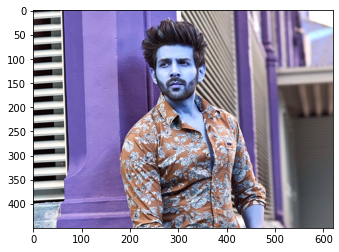

In [33]:
plt.imshow(img)

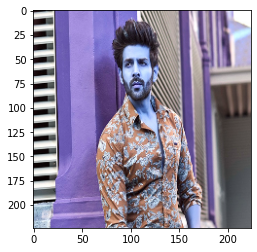

In [34]:
plt.imshow(img_resized)

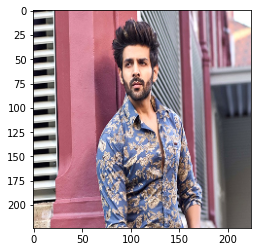

In [35]:
plt.imshow(cv2.cvtColor(img_resized,cv2.COLOR_BGR2RGB))

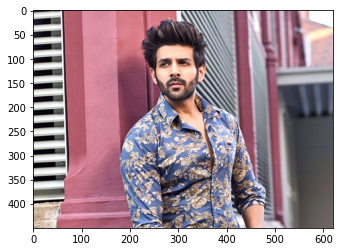

In [36]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [37]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [38]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [39]:
training_set=test_datagen.flow_from_directory('/content/sample_data',
                                              target_size=(width,height),
                                              batch_size=32,class_mode='categorical')

Found 12203 images belonging to 3 classes.


In [40]:
test_set=test_datagen.flow_from_directory('/content/sample_data',
                                          target_size=(width,height),
                                          batch_size=5,
                                          class_mode='categorical')

Found 12203 images belonging to 3 classes.


In [41]:
IMAGE_SIZE=[224,224]
#ADD PREPROCESSING LAYER TO FRONT OF VGG
vgg=VGG16(input_shape=IMAGE_SIZE,weights='imagenet',include_top=False)
#dont train existing weight
for layer in vgg.layers:
  layer.trainable=False
#useful for getting number of classes
folders=glob('/content/sample_data')

#our layer you should inpute more if u want
x=Flatten()(vgg.output)
x=Dense(1000,activation='relu')(x) 
prediction=Dense(len(folders),activation='softmax')(x)

In [50]:
#create model object
model=Model(inputs=vgg.input,outputs=prediction)
#view the structure of model
model.summary()

#tell the model what cost and optimization method use
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']

)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [51]:
r=model.fit_generator(training_set,validation_data=test_set,epochs=3)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3


InvalidArgumentError: ignored

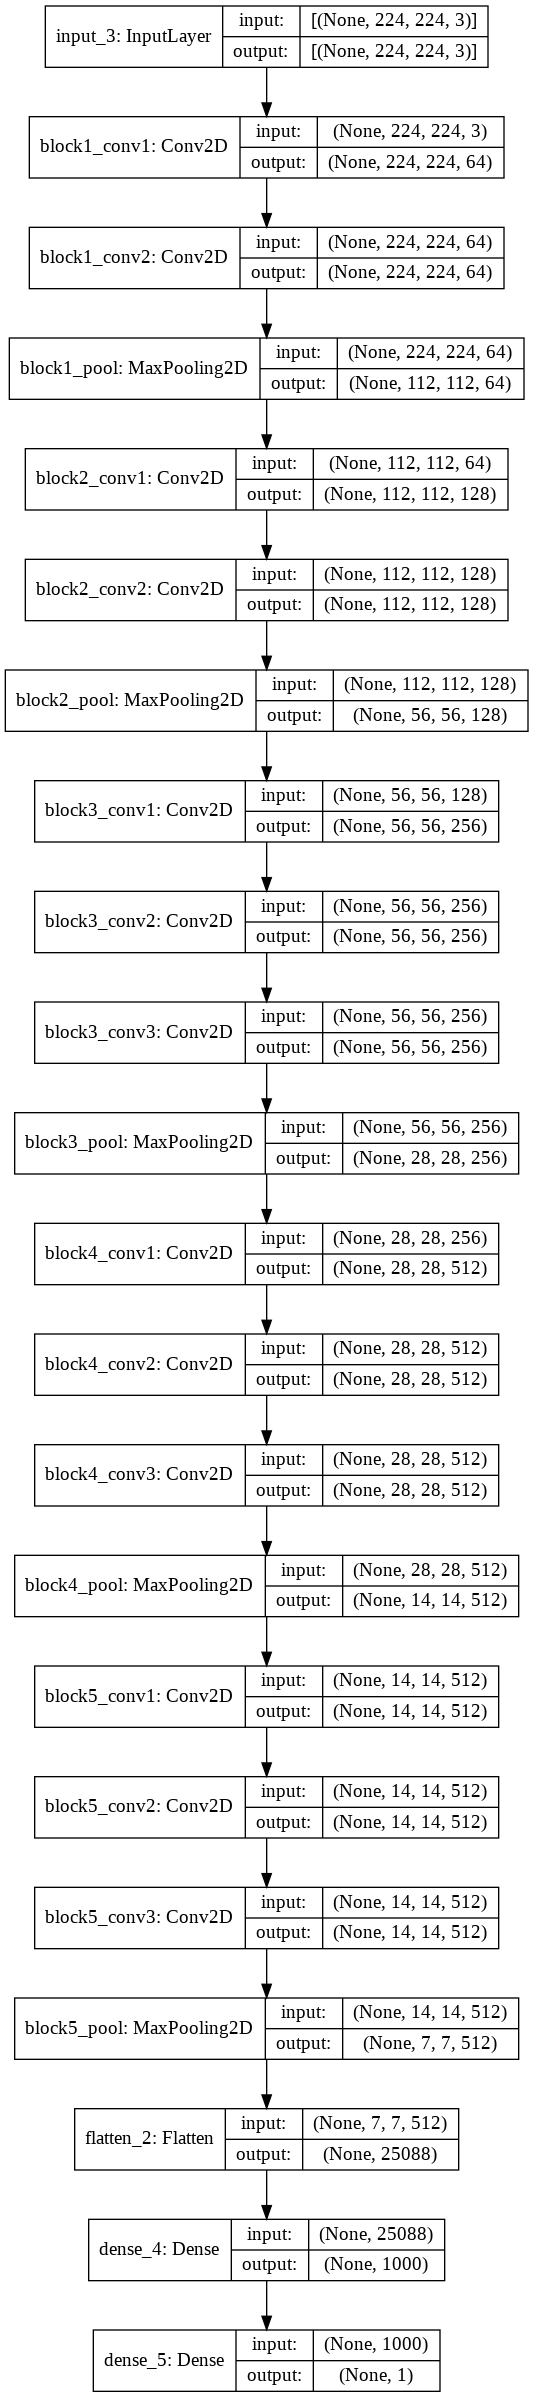

In [47]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)